In [2]:
%run C:/Users/HSS/dd.py

In [3]:
df = pd.DataFrame({'produce' : [7,8,10,11,12,14] 
                  ,'days' : [10,10,20,30,20,10]})

In [4]:
df

,days,produce
0,10,7
1,10,8
2,20,10
3,30,11
4,20,12
5,10,14


In [5]:
df['prob'] = df['days']/df['days'].sum()

In [6]:
df

,days,produce,prob
0,10,7,0.1
1,10,8,0.1
2,20,10,0.2
3,30,11,0.3
4,20,12,0.2
5,10,14,0.1


In [10]:
mean = df['produce']@ df['prob']
mean

10.600000000000001

In [13]:
var = ((df['produce']-mean)**2)@df['prob']
var

3.6400000000000006

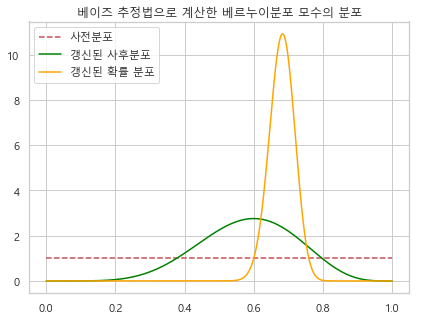

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(121)
xx = np.linspace(0, 1, 1000)

a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="사전분포")
a1, b1 = 3 + 1, 2 + 1
a2, b2 = 3 + a1, 2 + b1
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), c="green", ls="-", label="갱신된 사후분포")
a1, b1 = 55 + 1, 45 + 1
a2, b2 = 55+ a1, 45+ a2

plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), c="orange", ls="-", label="갱신된 확률 분포")

plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

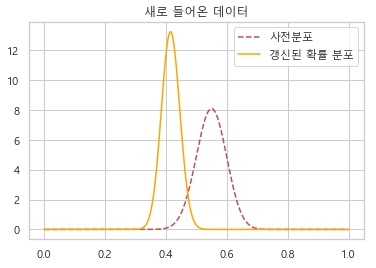

In [37]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="r", ls="--", label="사전분포")
a1, b1 = 55 + 1, 45 + 1
a2, b2 = 55+ a1, 45+ a2

plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), c="orange", ls="-", label="갱신된 확률 분포")
plt.legend()
plt.title("새로 들어온 데이터")
plt.show()

표본조사 1000명 중 520명이 찬성하였다. 전체 인구가 찬성이 더 많다고 할 수 있는가?
- 귀무가설 : Mu = 0.5 
- 대립가설 : Mu > 0.5
- 양측/단측? : 단측
- 유의확률은?: 1 - rv.cdf(520-1) = 0.10


In [53]:
rv = sp.stats.binom(1000, 0.5)

In [52]:
1 - rv.cdf(520-1)

0.10872414660212004

In [54]:
sp.stats.binom_test(520,1000,0.5,'greater')

0.10872414660212008

N번 던져서 앞면이 나오는 횟수를 측정했다.

- 1. N = 10, 유의수준이 10%라면몇회가 나와야 동전이 공정하지 않을까?

In [72]:
sp.stats.binom_test(70,1000,0.05,'two-sided')

0.005670160942553233

- 1000가구 표본조사에서 시청률이 5%, 유의수준 5%라면 몇가구가 시청해야 하는가?

In [80]:
n1 = 1000
pv = np.array([sp.stats.binom_test(n,n1,0.05,'two-sided') for n in range(n1+1)])
fr, = np.where(pv>0.05)

In [81]:
print('{}부터 {}가구 까지 봤을 때'.format(fr[0], fr[-1]))

37부터 63가구 까지 봤을 때


In [97]:
x = np.arange(10)
a = list(map((lambda x : x+5),x))

In [98]:
x[np.array(a)>6]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
x, np.array(a)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [101]:
tips = sns.load_dataset('tips')

In [102]:
tips[tips.day == 'Thur'].groupby('sex').size()

sex
Male      30
Female    32
dtype: int64

In [108]:
a = sp.stats.binom_test(32,62,0.5,'greater')


False

In [109]:
#토요일과 일요일에 남녀 손님의 비율은 다르다.


In [113]:
sat = tips[tips.day == 'Sat'].groupby('sex').size()

In [114]:
sun = tips[tips.day == 'Sun'].groupby('sex').size()

In [115]:
sat

sex
Male      59
Female    28
dtype: int64

남자 손님이 여자손님보다 팁 비율이 높다.

In [117]:
tips['rate'] = tips.tip / tips.total_bill
tips

,total_bill,tip,sex,smoker,day,time,size,rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


In [118]:
tips.groupby('sex').rate.mean()

sex
Male      0.157651
Female    0.166491
Name: rate, dtype: float64

In [120]:
## 등분산검정
male = tips.rate[tips.sex == 'Male']
female = tips.rate[tips.sex == 'Female']

In [129]:
sp.stats.bartlett(male, female),sp.stats.fligner(male, female),sp.stats.levene(male, female)

(BartlettResult(statistic=3.7760256531916165, pvalue=0.05199201633891371),
 FlignerResult(statistic=0.9521374099494737, pvalue=0.3291758341219779),
 LeveneResult(statistic=0.45919480694318376, pvalue=0.49864785897998365))

In [130]:
sp.stats.ttest_ind(male,female,equal_var = False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.25424561889275826)